In [1]:
# 导入需要的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# 加载数据集
players = pd.read_csv(r'./datasets/football_players.csv')

# 数据集信息
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   National_Position   1075 non-null   object 
 3   National_Kit        1075 non-null   float64
 4   Club                17588 non-null  object 
 5   Club_Position       17587 non-null  object 
 6   Club_Kit            17587 non-null  float64
 7   Club_Joining        17587 non-null  object 
 8   Contract_Expiry     17587 non-null  float64
 9   Rating              17588 non-null  int64  
 10  Height              17588 non-null  object 
 11  Weight              17588 non-null  object 
 12  Preffered_Foot      17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Work

### 数据集描述

数据集包含的是2017年活跃足球运动员的信息。

* Name 姓名
* Nationality 国籍
* National_Position 国家队位置
* National_Kit 国家队号码
* Club 所在俱乐部
* Club_Position 所在俱乐部位置
* Club_Kit 俱乐部号码
* Club_Joining 加入俱乐部时间
* Contract_Expiry 合同到期时间
* Rating 评分
* Height 身高
* Weight 体重
* Preffered_Foot 擅长左（右）脚
* Birth_Date 出生日期
* Age 年龄
* Preffered_Position 擅长位置
* Work_Rate 工作效率
* Weak_foot 非惯用脚使用频率
* Skill_Moves 技术等级
* Ball_Control 控球技术
* Dribbling 盘球（带球）能力
* Marking 盯人能力
* Sliding_Tackle 铲球
* Standing_Tackle 逼抢能力
* Aggression 攻击能力
* Reactions 反击
* Attacking_Position 攻击性跑位
* Interceptions 抢断
* Vision 视野
* Composure 镇静
* Crossing 下底传中
* Short_Pass 短传
* Long_Pass 长传
* Acceleration 加速度
* Speed 速度
* Stamina 体力
* Strength 强壮
* Balance 平衡
* Agility 敏捷度
* Jumping 跳跃
* Heading 投球
* Shot_Power 射门力量
* Finishing 射门
* Long_Shots 远射
* Curve 弧线
* Freekick_Accuracy 任意球精准度
* Penalties 点球
* Volleys 凌空能力
* GK_Positioning 门将位置感
* GK_Diving 扑救能力
* GK_Kicking 门将踢球能力
* GK_Handling 扑球脱手几率
* GK_Reflexes 门将反应度

In [3]:
# 设置展示的最大列数
pd.set_option('max_columns', 100)

# 随机展示数据
players.sample(5)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
4226,Leandro,Brazil,NaN,NaN,Kashima Antlers,Sub,11.0,01/10/2014,2018.0,71,175 cm,71 kg,Right,05/12/1993,23,ST/CAM,Medium / Medium,4,3,73,74,20,12,20,59,67,71,27,63,54,62,69,58,80,79,74,76,75,76,57,62,71,68,66,38,30,68,62,10,15,12,7,15
14750,Josh Barrett,Republic of Ireland,NaN,NaN,Reading,Res,29.0,10/13/2015,2018.0,59,181 cm,71 kg,Right,06/21/1998,18,CM/CAM,Medium / Low,2,3,64,63,50,44,48,41,57,52,49,58,59,52,60,57,67,69,58,50,68,62,54,39,56,51,56,54,51,49,50,13,5,14,9,9
9099,Romell Quioto,Honduras,NaN,NaN,Houston Dynamo,LW,12.0,12/23/2016,2022.0,69,180 cm,78 kg,Right,08/09/1991,25,ST/RW,High / Medium,3,3,65,62,13,12,17,78,56,75,31,48,73,55,67,49,81,84,70,60,70,85,80,70,68,67,63,72,43,63,49,14,9,8,7,13
2500,Alexander Baumjohann,Germany,NaN,NaN,Hertha BSC,Sub,9.0,07/01/2013,2017.0,74,178 cm,75 kg,Right,01/23/1987,30,CAM/LM,Medium / Low,4,3,78,78,12,21,22,47,71,70,28,78,65,71,75,67,65,59,51,60,83,78,53,59,70,63,70,72,71,59,68,7,11,6,14,7
2315,Haris Seferović,Switzerland,ST,9.0,Eint. Frankfurt,Sub,9.0,08/01/2014,2017.0,74,185 cm,85 kg,Left,02/22/1992,25,ST/LM,High / High,2,3,72,71,25,40,42,80,74,68,35,65,69,67,69,59,66,76,76,81,57,64,75,77,77,73,72,60,62,66,75,9,9,9,13,16


In [5]:
# 是否有异常值
players.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17587.000000,17587.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,12.219535,21.294536,2018.899414,66.166193,25.460314,2.934103,2.303161,57.972766,54.802877,44.230327,45.565499,47.441096,55.920173,61.770582,49.592051,46.794064,52.707869,55.853139,49.741073,58.119798,52.396065,65.287867,65.483853,63.476916,65.085854,64.008813,63.206732,64.918524,52.393109,55.581192,45.157607,47.403173,47.181146,43.383443,49.165738,43.275586,16.609620,16.823061,16.458324,16.559814,16.901183
std,6.933187,19.163741,1.698787,7.083012,4.680217,0.655927,0.746156,16.834779,18.913857,21.561703,21.515179,21.827815,17.445464,9.275210,19.407087,20.494715,14.589446,13.485994,18.457977,14.982582,15.616071,14.436296,14.100615,15.477377,12.532989,13.720288,14.618163,11.430807,17.473703,17.600155,19.374428,19.211887,18.464396,17.701903,15.871735,17.710839,17.139904,17.798052,16.600741,16.967256,18.034485
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,2.000000,29.000000,2.000000,3.000000,10.000000,5.000000,6.000000,10.000000,7.000000,11.000000,11.000000,10.000000,20.000000,10.000000,11.000000,15.000000,4.000000,3.000000,2.000000,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,44.000000,55.000000,37.000000,26.000000,43.000000,47.000000,38.000000,52.000000,42.000000,57.000000,58.000000,57.000000,57.000000,56.000000,55.000000,58.000000,45.000000,45.000000,29.000000,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,51.000000,54.000000,59.000000,62.000000,54.000000,52.000000,54.000000,57.000000,54.000000,62.000000,56.000000,68.000000,68.000000,66.000000,66.000000,65.000000,65.000000,65.000000,56.000000,59.000000,48.000000,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,70.000000,68.000000,64.000000,64.000000,64.000000,66.000000,64.000000,68.000000,64.000000,75.000000,75.000000,74.000000,74.000000,74.000000,74.000000,73.000000,65.000000,69.000000,61.000000,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,96.000000,96.000000,94.000000,93.000000,94.000000,94.000000,91.000000,92.000000,93.000000,96.000000,96.000000,95.000000,98.000000,97.000000,96.000000,95.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


In [7]:
# 是否有重复值
players.duplicated().any()

# 如果有重复值，则删除
players.drop_duplicates(inplace=True)

In [10]:
# 把身高、体重的值转换为int型
players['Height'] = players['Height'].map(lambda x : int(x.replace('cm', '')))
players['Weight'] = players['Weight'].map(lambda x : int(x.replace('kg', '')))

# 另一种实现方式
players['Height'] = players['Height'].str.replace('cm', '').astype(np.int)
players['Weight'] = players['Weight'].str.replace('kg', '').astype(np.int)

<AxesSubplot:ylabel='Density'>

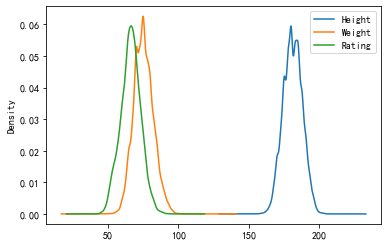

In [11]:
# 运动员身高、体重、评分数据分布
players[['Height', 'Weight', 'Rating']].plot(kind='kde')

In [12]:
# 左脚和右脚运动员在数量上的对比
players['Preffered_Foot'].value_counts()

Right    13494
Left      4094
Name: Preffered_Foot, dtype: int64

<AxesSubplot:>

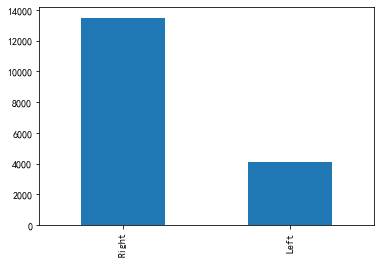

In [13]:
# 图表展示
players['Preffered_Foot'].value_counts().plot(kind='bar')

In [14]:
# 考虑球员平均评分，求top10评分的国家（超过20人）
nations = players.groupby('Nationality')['Rating'].agg(['count', 'sum', 'mean'])
nations = nations[nations['count'] > 20]
nations.sort_values('mean', ascending=False).head(10)

,count,sum,mean
Nationality,,,
Algeria,50,3581,71.620000
Czech Republic,57,4047,71.000000
Ecuador,34,2406,70.764706
Portugal,360,25329,70.358333
Morocco,74,5203,70.310811
Paraguay,75,5273,70.306667
Spain,1008,70859,70.296627
Brazil,921,64492,70.023887
Serbia,136,9482,69.720588


<AxesSubplot:>

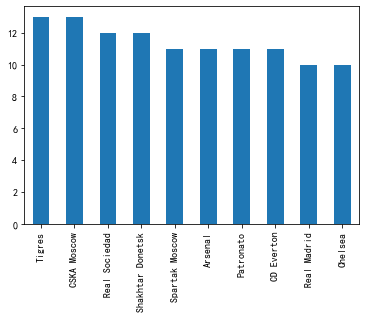

In [30]:
# 哪些俱乐部拥有更多忠心的球员（效力5年及以上）

# 获取球员加入俱乐部的年份
years = players['Club_Joining'].map(lambda x: str(x).split('/')[-1])

# 把年份转化为int类型
years = years[years != 'nan']  # 过滤掉异常值
years = years.astype(np.int, errors='ignore')  # 忽略类型转换错误

# 筛选效力5年及以上的球员
p = players[(2017 - years >= 5) & (players['Club'] != 'Free Agents')]

# 图表展示
p['Club'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:ylabel='0'>

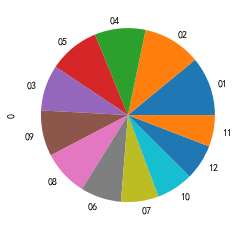

In [32]:
# 评分80及以上的球员出生月份分布
p = players[players['Rating'] >= 80]
p = p['Birth_Date'].str.split('/', expand=True)

p[0].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Club_Kit,Club_Position'>

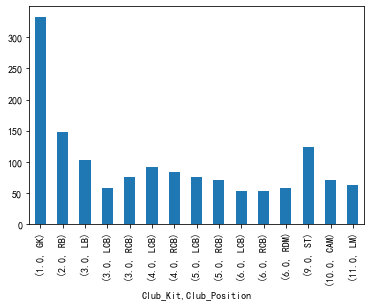

In [33]:
# 球员号码与位置的联合分布
# 去除替补球员和后备队球员
p = players[(players['Club_Position'] != 'Sub') & (players['Club_Position'] != 'Res')]
p = p.groupby(['Club_Kit', 'Club_Position']).size()
p[p > 50].plot(kind='bar')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

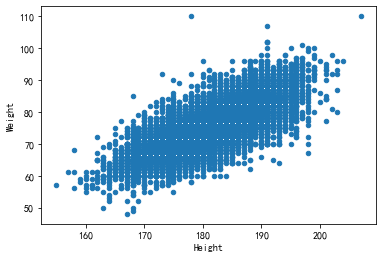

In [34]:
# 球员身高与体重的联合分布
players.plot.scatter(x='Height', y='Weight')

<AxesSubplot:xlabel='Age'>

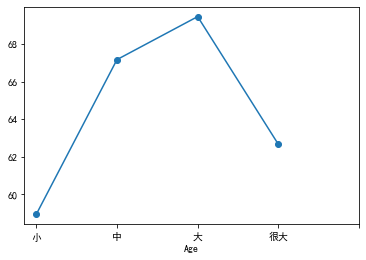

In [46]:
# 年龄和评分的关系
p = players[['Age', 'Rating']].copy()
p['Age'] = pd.cut(players['Age'], bins=[0, 20, 30, 40, 100], labels=['小', '中', '大', '很大'])
p.groupby('Age')['Rating'].mean().plot(kind='line', xticks=[0, 1, 2, 3, 4], marker='o')

In [35]:
# 哪些指标对评分的影响较大？
# 查看球员特征的相关系数
players.corr()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
National_Kit,1.000000,0.055408,-0.027211,-0.084289,-0.101229,-0.093795,-0.103583,0.027268,0.105903,0.046644,0.093836,-0.162083,-0.152251,-0.148329,-0.073288,-0.058696,0.124641,-0.154804,0.076988,-0.016093,0.045986,0.036071,-0.006230,0.079866,0.056282,0.003828,-0.099086,0.089038,0.085691,-0.100935,-0.072020,0.083610,0.138914,0.109168,0.081888,0.106621,0.095289,0.117381,-0.031492,-0.012435,-0.015472,-0.024611,-0.018816
Club_Kit,0.055408,1.000000,0.077060,-0.172710,-0.028711,-0.072341,-0.198230,-0.037234,0.006378,-0.071067,-0.028584,-0.105522,-0.094920,-0.104446,-0.121709,-0.148887,-0.031746,-0.125007,-0.071177,-0.117220,-0.067383,-0.085123,-0.100525,-0.006315,-0.010092,-0.101258,-0.141140,0.010762,-0.036128,-0.106797,-0.076264,-0.051829,-0.007898,-0.040658,-0.053631,-0.062077,-0.016220,-0.020482,0.004684,0.011290,0.008788,0.006725,0.007480
Contract_Expiry,-0.027211,0.077060,1.000000,0.047430,-0.080641,-0.053049,-0.118370,0.004865,0.044511,0.035324,0.048664,0.015409,0.011482,0.008307,-0.010361,0.051309,0.043698,0.006995,0.028113,0.005840,0.012553,0.034513,0.016371,0.071003,0.079394,0.053830,-0.012495,0.046095,0.047667,0.002805,0.026235,0.021477,0.032341,0.028781,0.010840,0.007001,0.020878,0.025120,-0.027994,-0.026117,-0.023273,-0.023064,-0.024923
Rating,-0.084289,-0.172710,0.047430,1.000000,0.047070,0.139766,0.458276,0.226411,0.252000,0.463286,0.368629,0.236683,0.215263,0.249037,0.404514,0.828369,0.354624,0.319436,0.489371,0.613693,0.401902,0.496192,0.483211,0.206355,0.224212,0.355279,0.369169,0.087729,0.283272,0.289911,0.343410,0.441881,0.328728,0.419628,0.420909,0.399739,0.340071,0.386628,-0.018657,-0.027657,-0.031752,-0.021379,-0.022995
Height,-0.101229,-0.028711,-0.080641,0.047070,1.000000,0.758213,0.076900,-0.180301,-0.431087,-0.402473,-0.483443,-0.042552,-0.069650,-0.054327,-0.048912,-0.016272,-0.419387,-0.050371,-0.359462,-0.169317,-0.471233,-0.356746,-0.323527,-0.521673,-0.451117,-0.293558,0.537271,-0.799775,-0.611175,-0.062979,0.005491,-0.273268,-0.346976,-0.364029,-0.422953,-0.379990,-0.321041,-0.333406,0.358736,0.357641,0.356019,0.359708,0.360235
Weight,-0.093795,-0.072341,-0.053049,0.139766,0.758213,1.000000,0.223489,-0.135326,-0.375112,-0.338387,-0.412902,-0.030551,-0.062340,-0.047123,0.017419,0.079086,-0.344747,-0.028956,-0.283012,-0.083462,-0.389242,-0.299255,-0.261587,-0.465555,-0.404238,-0.241365,0.613837,-0.680798,-0.535397,0.005880,0.019306,-0.188656,-0.281668,-0.274357,-0.343283,-0.293818,-0.246066,-0.258831,0.342469,0.340754,0.339478,0.341811,0.341774
Age,-0.103583,-0.198230,-0.118370,0.458276,0.076900,0.223489,1.000000,0.086377,-0.015930,0.083066,0.004740,0.131220,0.096527,0.116701,0.259564,0.456889,0.074116,0.192583,0.190185,0.355766,0.134694,0.127528,0.179145,-0.175938,-0.168417,0.070653,0.329459,-0.100202,-0.019456,0.168808,0.138045,0.151401,0.064778,0.149859,0.139331,0.195640,0.131781,0.134209,0.122239,0.105070,0.109820,0.113135,0.106927
Weak_foot,0.027268,-0.037234,0.004865,0.226411,-0.180301,-0.135326,0.086377,1.000000,0.336958,0.367495,0.363454,0.026852,0.025792,0.043587,0.134230,0.207241,0.354796,0.058122,0.352330,0.316599,0.324171,0.338905,0.298124,0.257129,0.240891,0.228593,-0.004686,0.253391,0.306025,0.064738,0.190986,0.335000,0.362094,0.365733,0.359143,0.345879,0.340888,0.366717,-0.232146,-0.236389,-0.230952,-0.233092,-0.235273
Skill_Moves,0.105903,0.006378,0.044511,0.252000,-0.431087,-0.375112,-0.015930,0.336958,1.000000,0.727139,0.762636,0.032755,0.042994,0.070801,0.230479,0.223310,0.719592,0.067393,0.591650,0.490892,0.644778,0.628079,0.515640,0.619603